In [11]:
%pwd

'/fs/lustre/scratch/horlaville/clara_limlam/limCode2020-master_clara_2'

In [3]:
%cd '/fs/lustre/scratch/horlaville/clara_limlam/limCode2020-master_clara_2/'

/fs/lustre/scratch/horlaville/clara_limlam/limCode2020-master_clara_2


In [10]:
%pwd

'/fs/lustre/scratch/horlaville/clara_limlam/limCode2020-master_clara_2'

In [4]:
import numpy as np
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
from datetime import datetime
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [5]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [6]:
m_cii.update(model_par = {'zdex': 0.4,
                            'M0': 1900000000.0,
                            'Mmin': 20000000000,
                            'alpha_MH1': 0.74,
                            'alpha_LCII': 0.024,
                            'BehrooziFile': 'sfr_reinterp.dat',
                            'alpha0': -1.412,
                            'gamma0': 0.31},
               tobs = 40000*u.GHz,
               nuObs = 270*u.GHz,
               Delta_nu = 40*u.GHz,
               Omega_field = 4*(u.deg**2),
               dnu = 2.8*u.GHz,
               catalogue_file = '/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz'
            )

In [7]:
signal = m_cii.maps

Loading .npz catalogues...


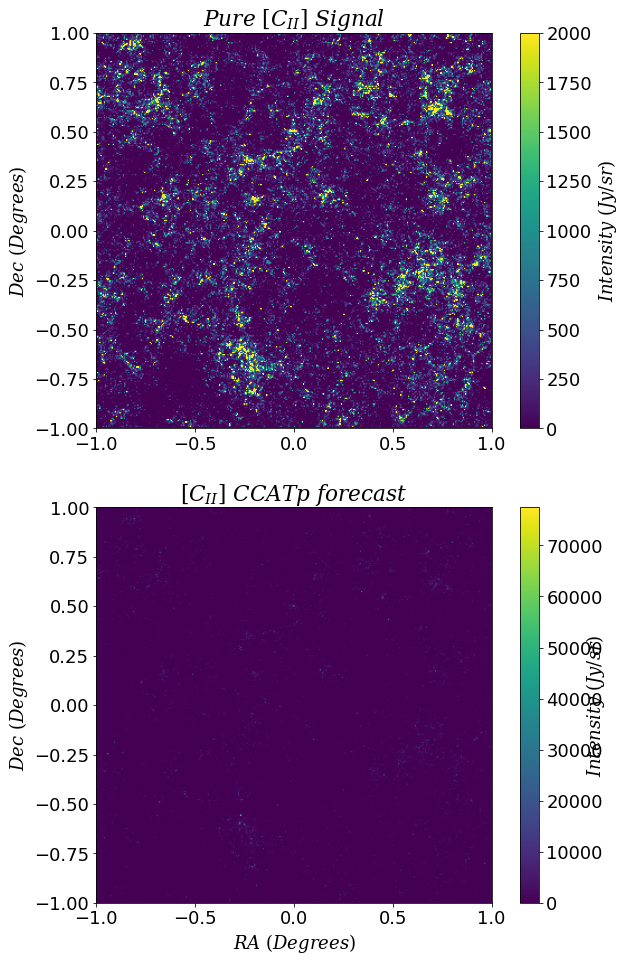

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 16))

plt.subplot(211)
plt.imshow(signal[:, :, 6], vmax = 2000, cmap =  'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$Pure\ [C_{II}]\ Signal$')
plt.ylabel(r'$Dec\ (Degrees)$')
cb1 = plt.colorbar()
cb1.set_label(r'$Intensity\ (Jy/sr)$')

plt.subplot(212)
plt.imshow(signal[:, :, 6], cmap =  'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$[C_{II}]\ CCATp\ forecast$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
cb2 = plt.colorbar()
cb2.set_label(r'$Intensity\ (Jy/sr)$', verticalalignment = 'bottom')

plt.savefig('paper_figs/try.png', bbox_inches = 'tight')